# Temporal networks

Temporal information can be described in several ways

In [1]:
import numpy as np
import os
import networkx as nx
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# in this case we have a list of edges for each year
files=os.listdir("data/nets_APS")
print (files)

['L-2002.txt', 'L-2003.txt', 'L-2001.txt', 'L-2000.txt', 'L-2004.txt', 'L-1965.txt', 'L-1971.txt', 'L-1970.txt', 'L-1964.txt', 'L-1999.txt', 'L-1972.txt', 'L-1966.txt', 'L-1967.txt', 'L-1973.txt', 'L-1998.txt', 'L-1988.txt', 'L-1977.txt', 'L-1963.txt', 'L-1962.txt', 'L-1976.txt', 'L-1989.txt', 'L-1960.txt', 'L-1974.txt', 'L-1975.txt', 'L-1961.txt', 'L-1987.txt', 'L-1993.txt', 'L-1978.txt', 'L-1979.txt', 'L-1992.txt', 'L-1986.txt', 'L-1990.txt', 'L-1984.txt', 'L-1985.txt', 'L-1991.txt', 'L-1995.txt', 'L-1981.txt', 'L-1980.txt', 'L-1994.txt', 'L-1982.txt', 'L-1996.txt', 'L-1969.txt', 'L-1968.txt', 'L-1997.txt', 'L-1983.txt']


In [4]:
# let us see how each file looks like
files=sorted(files)
for i in files:
    a=open("data/nets_APS/"+i,"r")
    for j in a:
        n=j.strip().split()
        print (i,n)   # each line is a paper, each id is an author
        break
    a.close()

L-1960.txt ['0', '1', '2']
L-1961.txt ['633', '634']
L-1962.txt ['1287', '1288']
L-1963.txt ['1831', '1832', '1833', '1834']
L-1964.txt ['2417', '2418']
L-1965.txt ['3073', '3074', '3075', '3076']
L-1966.txt ['3966', '1535']
L-1967.txt ['4993', '98']
L-1968.txt ['5993', '3907']
L-1969.txt ['7170', '7171', '7172', '7173']
L-1970.txt ['8274', '8275', '8276']
L-1971.txt ['9318', '9319', '9320']
L-1972.txt ['9557', '8658']
L-1973.txt ['9925', '9924', '11742']
L-1974.txt ['7387', '12699', '12700']
L-1975.txt ['12308', '3572']
L-1976.txt ['649', '610']
L-1977.txt ['15719', '15720']
L-1978.txt ['6259', '16738', '16739', '16740', '10416', '16741', '16742', '16743', '2721']
L-1979.txt ['17842', '16004']
L-1980.txt ['18905', '10494', '7331', '18906', '18907']
L-1981.txt ['8767', '20028', '17856', '19466', '2609']
L-1982.txt ['18610', '730']
L-1983.txt ['22123', '22124', '22125']
L-1984.txt ['23301', '19870']
L-1985.txt ['13937', '8476', '24674', '10071', '13096', '24189', '24675']
L-1986.txt ['4

In [5]:
# we create a dictionary of networks
graphs={}
for i in files:
    a=open("data/nets_APS/"+i,"r")
    G=nx.Graph()
    for j in a:
        n=j.strip().split()
        for k in range(len(n)):
            for l in range(len(n)):
                if k<l:
                    G.add_edge(int(n[k]),int(n[l]))
    graphs[i]=G

In [6]:
for i in sorted(graphs.keys()):
    print (i,graphs[i].number_of_edges())

L-1960.txt 836
L-1961.txt 1150
L-1962.txt 1165
L-1963.txt 1210
L-1964.txt 1433
L-1965.txt 2088
L-1966.txt 2517
L-1967.txt 2778
L-1968.txt 3270
L-1969.txt 3515
L-1970.txt 3180
L-1971.txt 3753
L-1972.txt 3622
L-1973.txt 3322
L-1974.txt 3730
L-1975.txt 4006
L-1976.txt 4043
L-1977.txt 3996
L-1978.txt 4608
L-1979.txt 4444
L-1980.txt 4590
L-1981.txt 4566
L-1982.txt 4223
L-1983.txt 4575
L-1984.txt 5606
L-1985.txt 6062
L-1986.txt 6571
L-1987.txt 6587
L-1988.txt 6731
L-1989.txt 7035
L-1990.txt 7758
L-1991.txt 8880
L-1992.txt 9534
L-1993.txt 10269
L-1994.txt 10240
L-1995.txt 13184
L-1996.txt 13302
L-1997.txt 13801
L-1998.txt 15765
L-1999.txt 15458
L-2000.txt 16850
L-2001.txt 17515
L-2002.txt 17424
L-2003.txt 17897
L-2004.txt 22098


In [ ]:
# another way of storing the network is using triplets i,j,t

In [7]:
a=open("data/t_net.txt","r")
for i in a:
    n=i.strip().split()
    print (n)
    break
a.close()

['22469', '5239', '1960']


In [8]:
# note that a couple i,j can be present at different t!
# there are many ways to store the network
# same as before
graphs={}
a=open("data/t_net.txt","r")
for i in a:
    n=i.strip().split()
    graphs.setdefault(n[2],nx.Graph())  # we have a network for each time
    graphs[n[2]].add_edge(n[0],n[1])
a.close()

In [9]:
for i in sorted(graphs.keys()):
    print (i,graphs[i].number_of_edges())

1960 836
1961 1150
1962 1165
1963 1210
1964 1433
1965 2088
1966 2517
1967 2778
1968 3270
1969 3515
1970 3180
1971 3753
1972 3622
1973 3322
1974 3730
1975 4006
1976 4043
1977 3996
1978 4608
1979 4444
1980 4590
1981 4566
1982 4223
1983 4575
1984 5606
1985 6062
1986 6571
1987 6587
1988 6731
1989 7035
1990 7758
1991 8880
1992 9534
1993 10269
1994 10240
1995 13184
1996 13302
1997 13801
1998 15765
1999 15458
2000 16850
2001 17515
2002 17424
2003 17897
2004 22098


In [10]:
# you can use a single network and add time as property of the links
a=open("data/t_net.txt","r")
G=nx.Graph()
for i in a:
    n=i.strip().split()
    G.add_edge(n[0],n[1])
    G[n[0]][n[1]].setdefault(int(n[2]),1)
a.close()

In [11]:
c=0
for i in G.edges():
    if c<100:
        print (i[0],i[1],sorted(G[i[0]][i[1]].keys()))
        c+=1

22469 5239 [1960]
5239 2019 [1967]
5239 2051 [1973, 1974, 1975, 1976, 1978]
5239 14840 [1976]
5239 16946 [1978]
22468 2042 [1960]
22468 4444 [1960]
2042 4444 [1960]
2042 2043 [1965]
4444 4445 [1967]
4444 19178 [1986, 1987]
4444 19177 [1986, 1987]
4444 27796 [1986, 1987, 1996]
4444 19179 [1994]
4444 42596 [1994, 1996]
14677 16767 [1960]
14677 14679 [1976]
14677 14678 [1976]
14677 899 [1976]
14677 14675 [1976]
14677 9376 [1976]
14677 14676 [1976]
14677 2502 [1976, 1978]
14677 11549 [1978]
14677 3752 [1978]
14677 10574 [1978]
14677 17855 [1978]
14677 14416 [1978]
14677 17854 [1978]
14677 17853 [1978]
22466 22467 [1960]
22466 3789 [1960]
22467 3789 [1960]
22467 25049 [1992]
22467 35640 [1992]
22467 38151 [1992]
22467 38152 [1992]
3789 371 [1966]
3789 3787 [1966]
3789 3788 [1966]
3789 3791 [1966]
3789 3790 [1966]
3789 3792 [1966]
3789 2078 [1966]
3789 64 [1966]
22464 730 [1960]
730 729 [1963]
22463 3365 [1960, 1985]
22463 22462 [1960]
22463 25303 [1985]
3365 22462 [1960]
3365 9201 [1971]
33

## Basic temporal metrics

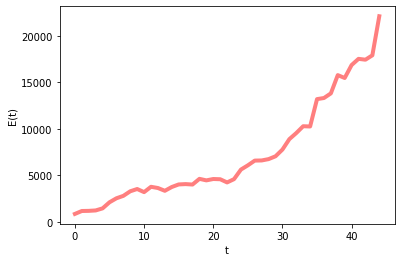

In [12]:
# number of links as function of time
n_edges_t=[]
for i in sorted(graphs.keys()):
    n_edges_t.append(graphs[i].number_of_edges())

    
plt.plot(n_edges_t,c="red",alpha=0.5,lw=4)
plt.xlabel("t")
plt.ylabel("E(t)")
plt.show()

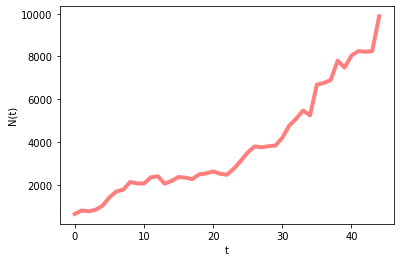

In [13]:
# number of nodes as function of time
n_nodes_t=[]
for i in sorted(graphs.keys()):
    n_nodes_t.append(graphs[i].number_of_nodes())

    
plt.plot(n_nodes_t,c="red",alpha=0.5,lw=4)
plt.xlabel("t")
plt.ylabel("N(t)")
plt.show()

In [14]:
# to study the growth it is better to refer to the aggregated network, i.e. total number of links and nodes
G_aggregated=nx.Graph()
for i in sorted(graphs.keys()):
    for j in graphs[i].edges():
        G_aggregated.add_edge(j[0],j[1])

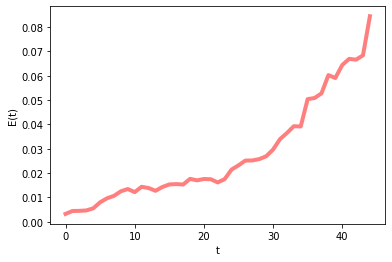

In [15]:
for i in range(len(n_edges_t)):
            n_edges_t[i]=n_edges_t[i]/float(G_aggregated.number_of_edges())
        
plt.plot(n_edges_t,c="red",alpha=0.5,lw=4)
plt.xlabel("t")
plt.ylabel("E(t)")
plt.show()

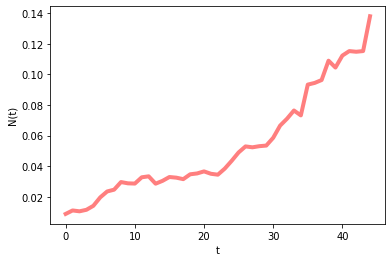

In [16]:
for i in range(len(n_nodes_t)):
            n_nodes_t[i]=n_nodes_t[i]/float(G_aggregated.number_of_nodes())
        
plt.plot(n_nodes_t,c="red",alpha=0.5,lw=4)
plt.xlabel("t")
plt.ylabel("N(t)")
plt.show()

In [17]:
# degree distribution at each time
import logbin as lb

In [18]:
dists=[]
for i in sorted(graphs.keys()):
    degree={}
    for j in graphs[i].nodes():
        degree[j]=graphs[i].degree(j)
    binned=lb.log_bin(degree,15)
    dists.append(binned)

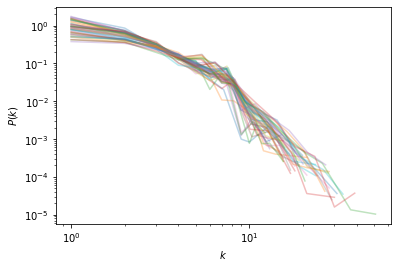

In [20]:
for i in dists:
    x=[]
    y=[]
    for j in i:
            x.append(j[0])
            y.append(j[1])
    plt.plot(x,y,alpha=0.3)

plt.xscale("log")
plt.yscale("log")
plt.xlabel('$k$')
plt.ylabel('$P(k)$')
plt.show()

In [ ]:
# let us compare it with the integrated distribution

In [21]:
degree={}
for j in G_aggregated.nodes():
        degree[j]=G_aggregated.degree(j)
binned=lb.log_bin(degree,15)
xa=[]
ya=[]
for i in binned:
    xa.append(i[0])
    ya.append(i[1])


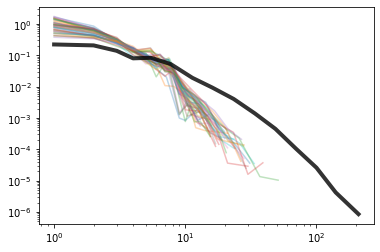

In [22]:
for i in dists:
    x=[]
    y=[]
    for j in i:
            x.append(j[0])
            y.append(j[1])
    plt.plot(x,y,alpha=0.3)

plt.plot(xa,ya,c="black",alpha=0.8,lw=4)
plt.xscale("log")
plt.yscale("log")
plt.show()

In [ ]:
# the aggregated network is clearly more heterogenous! 

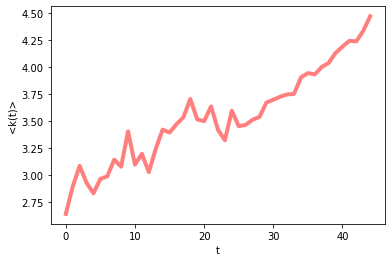

In [23]:
# average degree in each time window
ave_d_t=[]
for i in sorted(graphs.keys()):
    ave_d_t.append(2.*graphs[i].number_of_edges()/graphs[i].number_of_nodes())

plt.plot(ave_d_t,c="red",alpha=0.5,lw=4)
plt.xlabel("t")
plt.ylabel("<k(t)>")
plt.show()

In [ ]:
# the size of collaborations is increasing in time!

In [24]:
# interevent time: the time between two papers
# let us get the times in which a node wrote a paper
nodes_event={}
for i in sorted(graphs.keys()):
    for j in graphs[i].nodes():
        nodes_event.setdefault(j,[])
        nodes_event[j].append(int(i))    

In [25]:
# let us see the histogram of the size of these lists
max_l=0.
for i in nodes_event:
    if len(nodes_event[i])> max_l:
        max_l=len(nodes_event[i])
print (max_l)

37


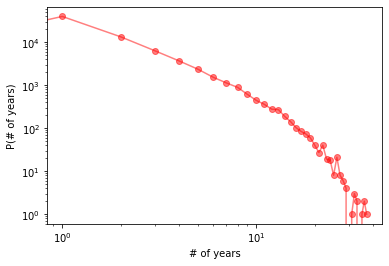

In [26]:
dist_l=np.zeros(max_l+1,int)
for i in nodes_event:
    dist_l[len(nodes_event[i])]+=1
plt.plot(dist_l,color="red",marker="o",alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("# of years")
plt.ylabel("P(# of years)")
plt.show()


In [ ]:
# let us make the distribution of the Delta t

In [27]:
list_deltas=[]
for i in nodes_event:
    if len(nodes_event[i])>1:
        for j in range(1,len(nodes_event[i])):
            delta=nodes_event[i][j]-nodes_event[i][j-1]
            list_deltas.append(delta)

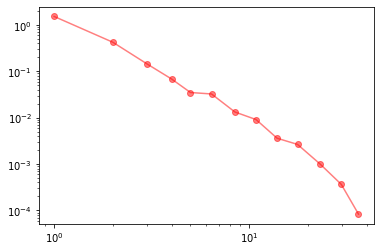

In [28]:
dict_list={}
for i in range(len(list_deltas)):
    dict_list[i]=list_deltas[i]
    
binned=lb.log_bin(dict_list,15)
xa=[]
ya=[]
for i in binned:
    xa.append(i[0])
    ya.append(i[1])

plt.plot(xa,ya,c="red",marker="o",alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.show()

## Processes on temporal networks

In [29]:
graphs={}
for i in files:
    a=open("data/nets_APS/"+i,"r")
    G=nx.Graph()
    for j in a:
        n=j.strip().split()
        for k in range(len(n)):
            for l in range(len(n)):
                if k<l:
                    G.add_edge(int(n[k]),int(n[l]))
    a.close()
    graphs[i]=G
    
G_aggregated=nx.Graph()
for i in sorted(graphs.keys()):
    for j in graphs[i].edges():
        G_aggregated.add_edge(j[0],j[1])

In [30]:
# random walk function
def random_walk(G,stop,W):
    t=0
    N=G.number_of_nodes()
    while t<stop:
        # temporary vector where to store who moves where at eact t
        temp=np.zeros(N,int)
        for source in G.nodes():
            # for each node we let diffuse the walkers out of it
            neighbors=list(G.neighbors(source))
            # we need to get the probabilities
            # we are assuming here that the probability of staying
            # in the intial node is 1-p=0
            # p could be in general the diffusion rate
            prob=[]
            degree=G.degree(source)
            for i in neighbors:
                prob.append(1./degree)
            # the probabilities are 1/k    
            output=np.random.multinomial(W[source], prob, size=1)
            # after calling the multinomial we know how to divide W(i)
            id=0
            for j in output[0]:
                temp[neighbors[id]]+=j
                id+=1
        # after the loop across all nodes
        # we update the values of W
        # note that this is correct just if p=1, as in this case
        for i in G.nodes():
            W[i]=temp[i]
        t+=1

In [31]:
# let us start with the random walk
# let us run it on the aggregated network


stop=50
average_W=5000
N=G_aggregated.number_of_nodes()
W=np.zeros(N,int)
for i in G_aggregated.nodes():
    W[i]=average_W
random_walk(G_aggregated,stop,W)

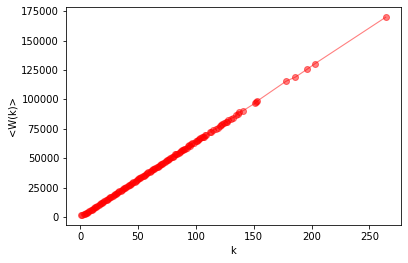

In [32]:
# let us plot the number of time a node has been visited as a function 
# of the degree
# let us create degree classes
max_degree=0
for i in G_aggregated.nodes():
    if G_aggregated.degree(i)>max_degree:
        max_degree=G_aggregated.degree(i) 
        
Nk=np.zeros(max_degree+1,int)
for i in G_aggregated.nodes():
    Nk[G_aggregated.degree(i)]+=1    
# let us plot avoiding the zeros        
histogram=np.zeros(max_degree+1,float)
toplot=set()
average_degree=0.
for i in range(N):
    average_degree+=float(G_aggregated.degree(i))/N
    if G_aggregated.degree(i)>0:
        histogram[G_aggregated.degree(i)]+=W[i]/Nk[G_aggregated.degree(i)]
        toplot.add(G_aggregated.degree(i)) # this is the set with all the present 
                                # degrees
x2=[]
y2=[]
for i in toplot:
    x2.append(i)
    y2.append(histogram[i])    
 
# this comes from the theory!    
slope_line=average_W/average_degree   
    
plt.plot(x2,y2,c="Red",linewidth=1.1, marker="o",alpha=0.5) 
plt.xlabel('k')
plt.ylabel('<W(k)>')
plt.show() 

In [ ]:
# in the case of temporal networks we can plot W as a function of a, the activity

In [33]:
# the interactions are measured in a given Delta t 
def get_activity(files,delta_t,N):
    d=0
    total_int=0.
    list_act=[]
    act=np.zeros(N,float)
    for i in range(len(files)):
        if d<delta_t:
            a=open("data/nets_APS/"+files[i],"r")
            for j in a:
                n=j.strip().split()
                for k in n:
                    act[int(k)]+=1. # each time there is an interaction +1
                    total_int+=1.   # total number of acts
            a.close()
            d+=1
        else:
            d=0
            for j in range(act.size):  # for each time window we save the activity
                if act[j]>0:        # of each node
                    list_act.append(act[j]/total_int)
            act=np.zeros(N,float)
            total_int=0.
            a=open("data/nets_APS/"+files[i],"r")
            for j in a:
                n=j.strip().split()
                for k in n:
                    act[int(k)]+=1.
                    total_int+=1.
            a.close()
            d+=1

    # we save the dictionary with all the activities
    dict_a={}
    c=0
    for i in list_act:
        dict_a[c]=i
        c+=1
        
    return dict_a

In [34]:
dict_a=get_activity(files,len(files)-1,N)

In [35]:
import math as math
import numpy as np

# log-log bin of a and W
def log_bin_a(dict,dict_y,n_bins):
    
    # first we need to define the interval of dict values
    
    min_val=sorted(dict.values())[0]
    max_val=sorted(dict.values())[-1]
    delta=(math.log(float(max_val))-math.log(float(min_val)))/n_bins
    
    # then we create the bins, in this case the log of the bins is equally spaced (bins size increases exponentially)
    
    bins=np.zeros(n_bins+1,float)
    bins[0]=min_val
    for i in range(1,n_bins+1):
        bins[i]=bins[i-1]*math.exp(delta)
        
    
    # then we need to assign the dict of each node to a bin
        
    values_in_bin=np.zeros(n_bins+1,float)
    values_in_bin_y=np.zeros(n_bins+1,float)
    nodes_in_bin=np.zeros(n_bins+1,float)  # this vector is crucial to evalute how many nodes are inside each bin
        
    for i in dict:
        for j in range(1,n_bins+1):
            if j<n_bins:
                if dict[i]<bins[j]:
                    values_in_bin[j]+=dict[i]
                    values_in_bin_y[j]+=dict_y[i]
                    nodes_in_bin[j]+=1.
                    break
            else:
                if dict[i]<=bins[j]:
                    values_in_bin[j]+=dict[i]
                    values_in_bin_y[j]+=dict_y[i]
                    nodes_in_bin[j]+=1.
                    break
    
    
    # then we need to evalutate the average x value in each bin
    
    for i in range(1,n_bins+1):
        if nodes_in_bin[i]>0:
            values_in_bin[i]=values_in_bin[i]/nodes_in_bin[i]
            values_in_bin_y[i]=values_in_bin_y[i]/nodes_in_bin[i]
            
    # finally we get the binned distribution        
            
    binned=[]
    for i in range(1,n_bins+1):
        if nodes_in_bin[i]>0:
                x=values_in_bin[i]
                y=values_in_bin_y[i]
                binned.append([x,y])
    return binned


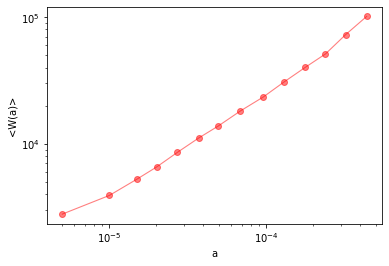

In [36]:
binned=log_bin_a(dict_a,W,15)
x=[]
y=[]
e=np.zeros(len(binned),float)
c=0
for i in binned:
    x.append(i[0])
    y.append(i[1])    
    e[c]=i[0]
    c+=1
    
plt.plot(x,y,c="Red",linewidth=1.1, marker="o",alpha=0.5) 
plt.xlabel('a')
plt.ylabel('<W(a)>')
plt.xscale("log")
plt.yscale("log")
plt.show() 

In [40]:
# let us see what happens when the walkers move in the temporal network
stop=100
average_W=5000
W=np.zeros(N,int)
for i in G_aggregated.nodes():
    W[i]=average_W

In [41]:
# we will use periodic boundary conditions
lista_times=[]
t=0
c=0
list_ids=sorted(graphs.keys())
while t<=stop:
    if c<len(graphs):
        lista_times.append(list_ids[c])
        c+=1
    else:
        c=0
    t+=1
print (lista_times)

['L-1960.txt', 'L-1961.txt', 'L-1962.txt', 'L-1963.txt', 'L-1964.txt', 'L-1965.txt', 'L-1966.txt', 'L-1967.txt', 'L-1968.txt', 'L-1969.txt', 'L-1970.txt', 'L-1971.txt', 'L-1972.txt', 'L-1973.txt', 'L-1974.txt', 'L-1975.txt', 'L-1976.txt', 'L-1977.txt', 'L-1978.txt', 'L-1979.txt', 'L-1980.txt', 'L-1981.txt', 'L-1982.txt', 'L-1983.txt', 'L-1984.txt', 'L-1985.txt', 'L-1986.txt', 'L-1987.txt', 'L-1988.txt', 'L-1989.txt', 'L-1990.txt', 'L-1991.txt', 'L-1992.txt', 'L-1993.txt', 'L-1994.txt', 'L-1995.txt', 'L-1996.txt', 'L-1997.txt', 'L-1998.txt', 'L-1999.txt', 'L-2000.txt', 'L-2001.txt', 'L-2002.txt', 'L-2003.txt', 'L-2004.txt', 'L-1960.txt', 'L-1961.txt', 'L-1962.txt', 'L-1963.txt', 'L-1964.txt', 'L-1965.txt', 'L-1966.txt', 'L-1967.txt', 'L-1968.txt', 'L-1969.txt', 'L-1970.txt', 'L-1971.txt', 'L-1972.txt', 'L-1973.txt', 'L-1974.txt', 'L-1975.txt', 'L-1976.txt', 'L-1977.txt', 'L-1978.txt', 'L-1979.txt', 'L-1980.txt', 'L-1981.txt', 'L-1982.txt', 'L-1983.txt', 'L-1984.txt', 'L-1985.txt', 'L-19

In [42]:
import numpy as np
import networkx as nx
def random_walk_temporal(G,W,N):

        # temporary vector where to store who moves where at eact t
        temp=np.zeros(N,int)
        for source in G.nodes():
            # for each node we let diffuse the walkers out of it
            neighbors=list(G.neighbors(source))
            # we need to get the probabilities
            # we are assuming here that the probability of staying
            # in the intial node is 1-p=0
            # p could be in general the diffusion rate
            prob=[]
            degree=G.degree(source)
            for i in neighbors:
                prob.append(1./degree)
            # the probabilities are 1/k    
            output=np.random.multinomial(W[source], prob, size=1)
            # after calling the multinomial we know how to divide W(i)
            id=0
            for j in output[0]:
                temp[neighbors[id]]+=j
                id+=1
        # after the loop across all nodes
        # we update the values of W
        # note that this is correct just if p=1, as in this case
        for i in G.nodes():
            W[i]=temp[i]    

In [43]:
for t in lista_times:
    random_walk_temporal(graphs[t],W,G_aggregated.number_of_nodes())

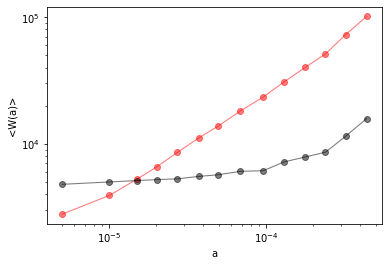

In [44]:
binned=log_bin_a(dict_a,W,15)
x2=[]
y2=[]
for i in binned:
    x2.append(i[0])
    y2.append(i[1])    
  
    
plt.plot(x,y,c="Red",linewidth=1.1, marker="o",alpha=0.5) 
plt.plot(x2,y2,c="Black",linewidth=1.1, marker="o",alpha=0.5) 
plt.xlabel('a')
plt.ylabel('<W(a)>')
plt.xscale("log")
plt.yscale("log")
plt.show()

In [ ]:
# extremely different behavior!

## Epidemic Spreading

In [47]:
# these are fucntions we discussed in the past lab sessions

def SI_net(G,lambd,status):
    # we make the process syncronous
    # at each time step all infected indivuals can infect their peers
    # status is a vector that takes two values for each node
    # 0 -> S
    # 1 -> I
    temp=set()
    for i in G.nodes():
        # if the node is infected
        if status[i]==1:
            # we go through her neighbors an we try to infect each S
            for j in G.neighbors(i):
                if status[j]==0 and uniform(0,1)<lambd:
                    temp.add(j) # this node will be infected next
                                
    # update the status
    for i in temp:
        status[i]=1
        
        
def SIR_net(N,G,lambd,mu,status):
    # we make the process syncronous
    # at each time step all infected indivuals can infect their peers
    # status is a vector that takes two values for each node
    # 0 -> S
    # 1 -> I
    temp_inf=set()
    temp_rec=set()
    for i in G.nodes():
        # if the node is infected
        if status[i]==1:
            # we go through her neighbors and we try to infect the S
            for j in G.neighbors(i):
                if status[j]==0 and uniform(0,1)<lambd:
                    temp_inf.add(j) # this node will be infected next
            
    # note that we changed the function a bit respect to before. Note the new loop in N
    # why is that?!
    for i in range(N):
        if status[i]==1:
            if uniform(0,1)<mu:
                temp_rec.add(i)
                
    # update the status
    for i in temp_inf:
        status[i]=1  
    for i in temp_rec:
        status[i]=2

def SIS_net(N,G,lambd,mu,status):
    # we make the process syncronous
    # at each time step all infected indivuals can infect their peers
    # status is a vector that takes two values for each node
    # 0 -> S
    # 1 -> I
    temp_inf=set()
    temp_rec=set()
    for i in G.nodes():
        # if the node is infected
        if status[i]==1:
            # we go through her neighbors and we try to infect the S
            for j in G.neighbors(i):
                if status[j]==0 and uniform(0,1)<lambd:
                    temp_inf.add(j) # this node will be infected next
            
    # note that we changed the function a bit respect to before. Note the new loop in N
    # why is that?!
    for i in range(N):
        if status[i]==1:
            if uniform(0,1)<mu:
                temp_rec.add(i)
                
    # update the status
    for i in temp_inf:
        status[i]=1  
    for i in temp_rec:
        status[i]=0
        
def set_seeds(status,p):
    # we get the number of infected given a fraction p
    n_of_infected=int(p*status.size)
    # we get the list of nodes and shuffle it
    list_nodes=[]
    for i in range(status.size):
        list_nodes.append(i)
    shuffle(list_nodes)
    
    # the first n_of_infected will be the seeds
    for i in range(n_of_infected):
        status[list_nodes[i]]=1

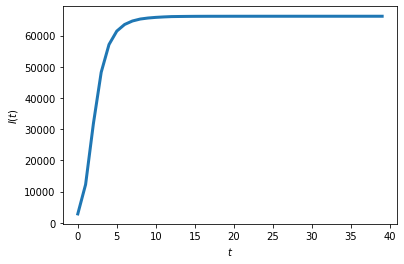

In [48]:
# let's run first a SI in the integrated graph

N=G_aggregated.number_of_nodes()

status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I
p=0.01 # initial seeds
lambd=0.4
tmax=40

set_seeds(status,p) # setting the seeds
it=[]
for t in range(tmax):
    SI_net(G_aggregated,lambd,status)
    it.append(status.sum())
    
plt.plot(it,lw=3)
plt.xlabel('$t$')
plt.ylabel('$I(t)$')
plt.show()

In [ ]:
# let's run it in the time varying network 
lista_times=[]
t=0
c=0
list_ids=sorted(graphs.keys())
tmax=40
while t<=tmax:
    if c<len(graphs):
        lista_times.append(list_ids[c])
        c+=1
    else:
        c=0
    t+=1
print (lista_times)

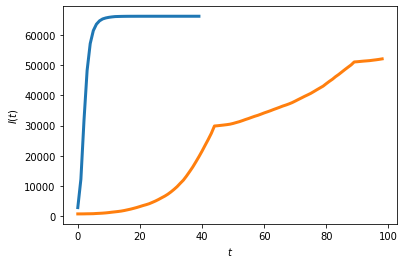

In [49]:
N=G_aggregated.number_of_nodes()

status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I
p=0.01 # initial seeds
lambd=0.4
tmax=40

set_seeds(status,p)


it_t=[]
for t in lista_times:
    SI_net(graphs[t],lambd,status)
    it_t.append(status.sum())

plt.plot(it,lw=3)
plt.plot(it_t,lw=3)
plt.xlabel('$t$')
plt.ylabel('$I(t)$')
plt.show()

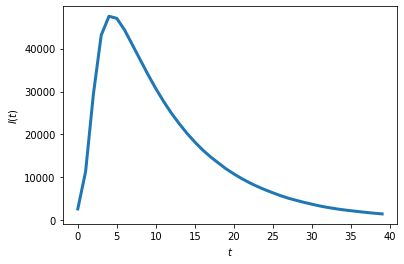

In [50]:
# what about an SIR model?

N=G_aggregated.number_of_nodes()

status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] = 2 for R
p=0.01 # initial seeds
lambd=0.4
mu=0.1
tmax=40

set_seeds(status,p) # setting the seeds
it=[]
for t in range(tmax):
    SIR_net(N,G_aggregated,lambd,mu,status)
    
    inf=0.
    for j in G_aggregated.nodes():
        if status[j]==1:
            inf+=1.
        
    it.append(inf)
    
plt.plot(it,lw=3)
plt.xlabel('$t$')
plt.ylabel('$I(t)$')
plt.show()

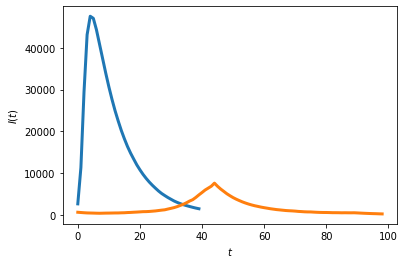

In [51]:
N=G_aggregated.number_of_nodes()

status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] = 2 for R
p=0.01 # initial seeds
lambd=0.4
mu=0.1
tmax=40

set_seeds(status,p)


it_t=[]
for t in lista_times:
    SIR_net(N,graphs[t],lambd,mu,status)
    inf=0.
    for j in G_aggregated.nodes():
        if status[j]==1:
            inf+=1.
        
    it_t.append(inf)

plt.plot(it,lw=3)
plt.plot(it_t,lw=3)
plt.xlabel('$t$')
plt.ylabel('$I(t)$')
plt.show()

In [ ]:
# very different behavior

## Activity driven networks

In [52]:
# activity are heterogenously distributed
# let us approximate them as power law
def power_law_dist(eps,alpha):
    return ((1.-eps**(alpha+1.))*uniform(0,1)+eps**(alpha+1))**(1./(alpha+1.))

In [53]:
N=10000
eps=1e-3
alpha=-2.1
activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)

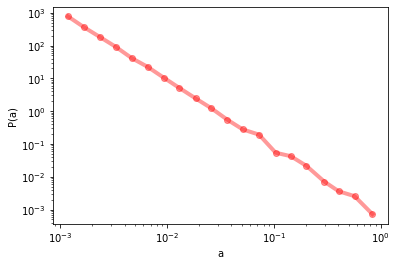

In [55]:
# let us check the distribution
binned=lb.log_bin(activity,20)
x=[]
y=[]
for i in binned:
    x.append(i[0])
    y.append(i[1])
plt.plot(x,y,c="red",alpha=0.4,lw=4,marker='o')
plt.xscale("log")
plt.xlabel("a")
plt.ylabel("P(a)")
plt.yscale("log")
plt.show()

In [56]:
def activity_driven_net(activity,m):
    G=nx.Graph()
    act=[]
    # active nodes
    N=len(activity)
    for i in range(N):
        if uniform(0,1)<activity[i]:
            act.append(i)
    # let us create the network
    for i in act:
        c=0
        G.add_node(i)
        while c<m:
            target=randint(N)
            if target!=i and target not in G.neighbors(i):
                G.add_edge(i,target)
                c+=1
    return G

In [57]:
tmax=10
m=2
for t in range(tmax):
    G=activity_driven_net(activity,m)
    
    print (2.*G.number_of_edges()/N)

0.0228
0.0224
0.0212
0.0232
0.0204
0.02
0.022
0.0248
0.0228
0.0252


In [58]:
# let us check if it is corrected
# <k>=2m<a>
ave_a=0.
for i in range(N):
    ave_a+=activity[i]/N
print (2.*m*ave_a)

0.023352617229028694


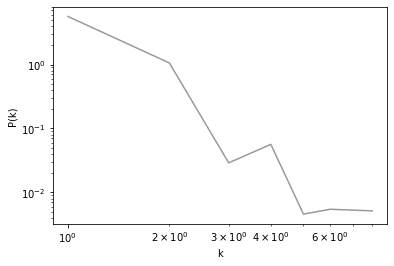

In [59]:
# let us see how the aggregated degree distribtuion looks like
G_agg=nx.Graph()
tmax=5
m=2
for t in range(tmax):
    G=activity_driven_net(activity,m)
    for j in G.edges():
        G_agg.add_edge(j[0],j[1])
degree={}
for i in G_agg.nodes():
    degree[i]=G_agg.degree(i)

binned=lb.log_bin(degree,20)
x_1=[]
y_1=[]
for i in binned:
    x_1.append(i[0])
    y_1.append(i[1])
plt.plot(x_1,y_1,c="black",alpha=0.4)
plt.xscale("log")
plt.xlabel("k")
plt.ylabel("P(k)")
plt.yscale("log")
plt.show()

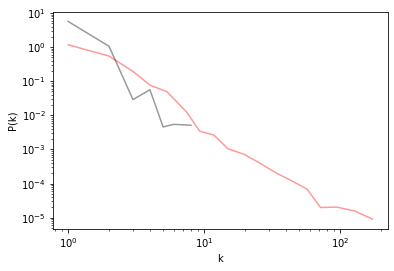

In [60]:
G_agg=nx.Graph()
tmax=100
m=2
for t in range(tmax):
    G=activity_driven_net(activity,m)
    for j in G.edges():
        G_agg.add_edge(j[0],j[1])
degree={}
for i in G_agg.nodes():
    degree[i]=G_agg.degree(i)

binned=lb.log_bin(degree,20)
x_100=[]
y_100=[]
for i in binned:
    x_100.append(i[0])
    y_100.append(i[1])
plt.plot(x_1,y_1,c="black",alpha=0.4)
plt.plot(x_100,y_100,c="red",alpha=0.4)
plt.xscale("log")
plt.xlabel("k")
plt.ylabel("P(k)")
plt.yscale("log")
plt.show()

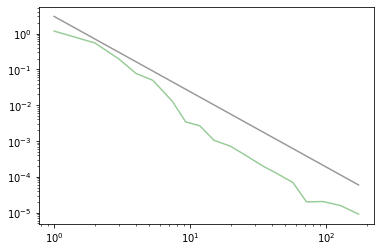

In [62]:
def p_line(a,b,t):
    return a*t**(-b)
x=np.zeros(len(x_100),float)
c=0
for i in range(len(x_100)):
    x[c]=x_100[c]
    c+=1

plt.plot(x_100,y_100,c="green",alpha=0.4)
plt.plot(x,p_line(3,2.1,x),c="black",alpha=0.4)
plt.xscale("log")
plt.yscale("log")
plt.show()

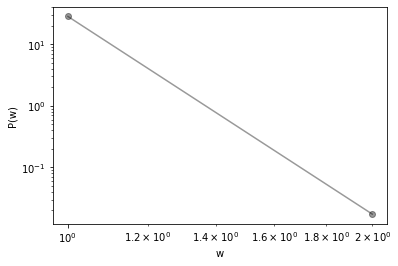

In [63]:
# what about the weight distribution?
G_agg=nx.Graph()
tmax=100
m=2
weights={}
for t in range(tmax):
    G=activity_driven_net(activity,m)
    for j in G.edges():
        G_agg.add_edge(j[0],j[1])
        pair=str(j[0])+"-"+str(j[1]) # this is unique for each pair of nodes
        weights.setdefault(pair,0)
        weights[pair]+=1.
        

binned=lb.log_bin(weights,20)
x=[]
y=[]
for i in binned:
    x.append(i[0])
    y.append(i[1])
plt.plot(x,y,c="black",alpha=0.4,marker='o')
plt.xscale("log")
plt.xlabel("w")
plt.ylabel("P(w)")
plt.yscale("log")
plt.show()

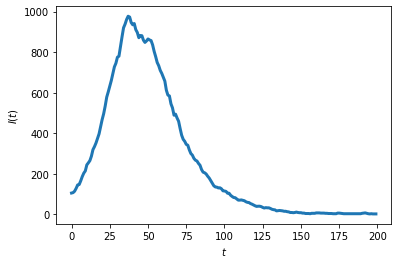

In [64]:
# SIR models on activity-driven networks
N=10000
eps=1e-2
alpha=-2.1
activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)

tmax=200
m=2
    
status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I
p=0.01 # initial seeds
lambd=0.8
mu=0.1

set_seeds(status,p)


it_t=[]
for t in range(tmax):
    G=activity_driven_net(activity,m)
    SIR_net(N,G,lambd,mu,status)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1.
        
    it_t.append(inf)

plt.plot(it_t,lw=3)
plt.xlabel('$t$')
plt.ylabel('$I(t)$')
plt.show()

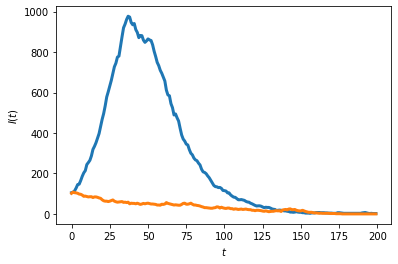

In [65]:
# let's change the distribution of activity

N=10000
eps=1e-2
alpha=-2.8 # decay much faster
activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)

tmax=200
m=2
    
status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I
p=0.01 # initial seeds
lambd=0.8
mu=0.1

set_seeds(status,p)


it_t2=[]
for t in range(tmax):
    G=activity_driven_net(activity,m)
    SIR_net(N,G,lambd,mu,status)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1.
        
    it_t2.append(inf)

plt.plot(it_t,lw=3)
plt.plot(it_t2,lw=3)
plt.xlabel('$t$')
plt.ylabel('$I(t)$')
plt.show()

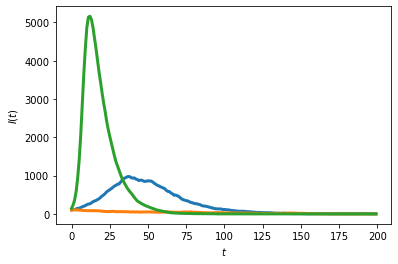

In [66]:
# let's change the distribution of activity

N=10000
eps=1e-2
alpha=-1.1 # decay much slower 
activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)

tmax=200
m=2
    
status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I
p=0.01 # initial seeds
lambd=0.8
mu=0.1

set_seeds(status,p)


it_t3=[]
for t in range(tmax):
    G=activity_driven_net(activity,m)
    SIR_net(N,G,lambd,mu,status)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1.
        
    it_t3.append(inf)

plt.plot(it_t,lw=3)
plt.plot(it_t2,lw=3)
plt.plot(it_t3,lw=3)
plt.xlabel('$t$')
plt.ylabel('$I(t)$')
plt.show()

In [ ]:
# estimation of the threshold
# this is a second order phase transion, we could fix mu and see what happens to R_infty as function of lambda
# for real estimations, you will have to repeat this for many stochastic realizations and much larger networks

$$\frac{\lambda}{\mu} \ge \frac{1}{m}\frac{1}{\langle a \rangle+\sqrt{\langle a^2 \rangle}}$$
which implies
$$\frac{\lambda}{\mu} m \left ( \langle a \rangle+\sqrt{\langle a^2 \rangle} \right ) = R_0 \ge 1$$

0.02426710694074222 102.0
0.13307404281318783 111.0
0.2521394102623714 128.0
0.5273122499326697 154.0
0.7594964701868231 421.0
1.0320602253446538 956.0
1.292206132796929 2224.0
1.5654263200771354 3379.0
1.7667274206248877 4321.0


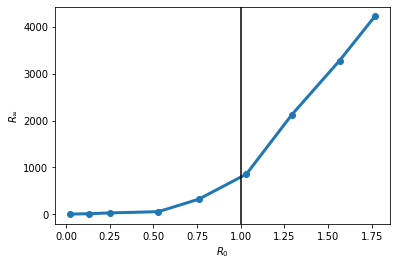

In [68]:
N=10000
eps=1e-2
alpha=-2.1 # decay much slower 
m=2
mu=0.1
p=0.01 # initial seeds


    
x=[]
y=[]
lambd_val=[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7] # let's get some values of lambd

for b in lambd_val:
    activity={}
    for i in range(N):
        activity[i]=power_law_dist(eps,alpha)
        

    ave_a=0.
    ave_a2=0.
    for i in activity:
        ave_a+=activity[i]/N
        ave_a2+=activity[i]**2./N
        
    thre=(m*(ave_a+ ave_a2**0.5))**(-1.) # this the threshold from the analytical calculations

    
    status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

    set_seeds(status,p)
    c=0
    while c<1: # we run until there are infected!
        G=activity_driven_net(activity,m)
        SIR_net(N,G,b,mu,status)
        c=1
        for j in range(N):
            if status[j]==1:
                c=0
                break

    r_inf=0.
    for j in range(N):
        if status[j]==2:
                r_inf+=1
    print (b/(mu*thre),r_inf)
    x.append(b/(mu*thre))
    y.append(r_inf-p*N) # recovered besided the seeds


plt.plot(x,y,lw=3,marker='o')
plt.axvline(x=1,color='Black')
plt.xlabel('$R_0$')
plt.ylabel('$R_\infty$')
plt.show()

In [ ]:
# what about SIS model?
# The estimation of I_infty is much more complicated!
# this is due to the endemic state
# A more precise method is quantifying the "life time" of the process which is equivalent to the susceptibility
# in a second order phase transition
# L is the time the disease needs to die out or reach a fraction f of the pop

0.02501683385415094 53
0.12879798932362357 46
0.2564161939084506 44
0.48463254666919775 85
0.7737152983669148 186
1.0573435181627826 4676
1.2824276582790157 298
1.5470863936617387 66
1.8333262482774102 42


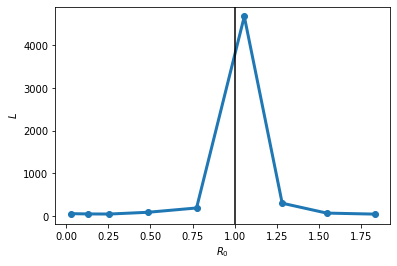

In [69]:
N=10000
eps=1e-2
alpha=-2.1 # decay much slower 
m=2
mu=0.1
p=0.01 # initial seeds

f=0.1*N # fraction of population to reach
    
x=[]
y=[]
lambd_val=[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7] # let's get some values of lambd

for b in lambd_val:
    activity={}
    for i in range(N):
        activity[i]=power_law_dist(eps,alpha)
        

    ave_a=0.
    ave_a2=0.
    for i in activity:
        ave_a+=activity[i]/N
        ave_a2+=activity[i]**2./N
        
    thre=(m*(ave_a+ ave_a2**0.5))**(-1.) # this the threshold from the analytical calculations

    
    status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I; status[i] =2 for R

    set_seeds(status,p)
    c=0
    t=0
    while c<1: # we run until there are infected!
        G=activity_driven_net(activity,m)
        SIS_net(N,G,b,mu,status)

        t+=1
        if status.sum()>=f or status.sum()==0.: # stop either if you reach f or I=0
            c=1
            
    print (b/(mu*thre),t)
    x.append(b/(mu*thre))
    y.append(t) # recovered besided the seeds


plt.plot(x,y,lw=3,marker='o')
plt.axvline(x=1,color='Black')
plt.xlabel('$R_0$')
plt.ylabel('$L$')
plt.show()

In [ ]:
#it works
# also in this case many more simulations per point and in much large systems!

In [ ]:
# activity driven models with memory

$$p(n)=\left (1+\frac{n}{c} \right )^{-\beta}$$

In [70]:
# let's create a dictionary where we keep track of all the people each node connected with
# this is the memory, we need this to evaluate the p(n)
def activity_driven_net_memory(activity,offset,beta,memory,m):
    G=nx.Graph()
    act=[]
    # active nodes
    N=len(activity)
    for i in range(N):
        if uniform(0,1)<activity[i]:
            act.append(i)
    # let us create the network
    for i in act:
        c=0
        G.add_node(i)
        memory.setdefault(i,{}) # this is the memory dictionary
        while c<m:
            pn=(1.+len(memory[i])/offset)**(-beta)
            
            if uniform(0,1)<pn: # prob. of creating a new connection
                target=randint(N)
                if target!=i and target not in G.neighbors(i):
                    G.add_edge(i,target)
                    memory[i].setdefault(target,1) # add the target to the memory of i
                    
                    memory.setdefault(target,{}) # lets add i in the memory of target!
                    memory[target].setdefault(i,1)
                    c+=1
            else:
                # reinforcment process towards connections activated in the past
                
                neigh=list(memory[i].keys()) # we pick at random in the list of past connections
                ids=randint(len(neigh))
                target=neigh[ids]
                
                if target not in G.neighbors(i):
                    G.add_edge(i,target)
                    c+=1
                
    return G

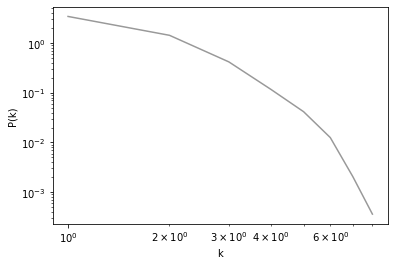

In [71]:
N=10000
eps=1e-2
alpha=-2.1 # decay much slower 
m=2
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)

tmax=10
memory={}
offset=1
beta=1.

# let us see how the aggregated degree distribtuion looks like
G_agg=nx.Graph()

for t in range(tmax):
    G=activity_driven_net_memory(activity,offset,beta,memory,m)
    for j in G.edges():
        G_agg.add_edge(j[0],j[1])
degree={}
for i in G_agg.nodes():
    degree[i]=G_agg.degree(i)

binned=lb.log_bin(degree,20)
x_1=[]
y_1=[]
for i in binned:
    x_1.append(i[0])
    y_1.append(i[1])
plt.plot(x_1,y_1,c="black",alpha=0.4)
plt.xscale("log")
plt.xlabel("k")
plt.ylabel("P(k)")
plt.yscale("log")
plt.show()

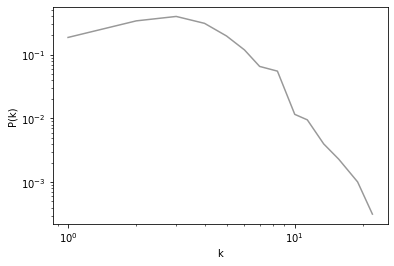

In [72]:
N=10000
eps=1e-2
alpha=-2.1 # decay much slower 
m=2
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)

tmax=100
memory={}
offset=1
beta=1.

# let us see how the aggregated degree distribtuion looks like
G_agg=nx.Graph()

for t in range(tmax):
    G=activity_driven_net_memory(activity,offset,beta,memory,m)
    for j in G.edges():
        G_agg.add_edge(j[0],j[1])
degree={}
for i in G_agg.nodes():
    degree[i]=G_agg.degree(i)

binned=lb.log_bin(degree,20)
x_1=[]
y_1=[]
for i in binned:
    x_1.append(i[0])
    y_1.append(i[1])
plt.plot(x_1,y_1,c="black",alpha=0.4)
plt.xscale("log")
plt.xlabel("k")
plt.ylabel("P(k)")
plt.yscale("log")
plt.show()

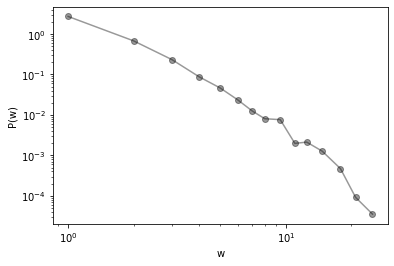

In [73]:
# what about the weight distribution?
G_agg=nx.Graph()
tmax=100
m=2
weights={}
memory={}
for t in range(tmax):
    G=activity_driven_net_memory(activity,offset,beta,memory,m)
    for j in G.edges():
        G_agg.add_edge(j[0],j[1])
        pair=str(j[0])+"-"+str(j[1]) # this is unique for each pair of nodes
        weights.setdefault(pair,0)
        weights[pair]+=1.
        

binned=lb.log_bin(weights,20)
x=[]
y=[]
for i in binned:
    x.append(i[0])
    y.append(i[1])
plt.plot(x,y,c="black",alpha=0.4,marker='o')
plt.xscale("log")
plt.xlabel("w")
plt.ylabel("P(w)")
plt.yscale("log")
plt.show()

In [ ]:
# emergence of weak and strong ties
# what's the effect on epidemic spreading?

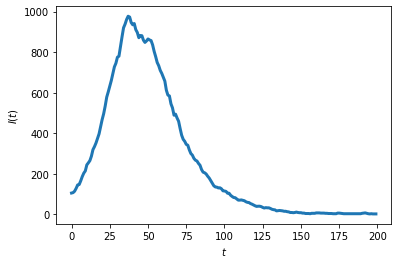

In [74]:
# let's get first the baseline

N=10000
eps=1e-2
alpha=-2.1 # decay much slower 
activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)

tmax=200
m=2
    
status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I
p=0.01 # initial seeds
lambd=0.8
mu=0.1

set_seeds(status,p)


it=[]
for t in range(tmax):
    G=activity_driven_net(activity,m)
    SIR_net(N,G,lambd,mu,status)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1.
        
    it.append(inf)

plt.plot(it_t,lw=3)
plt.xlabel('$t$')
plt.ylabel('$I(t)$')
plt.show()

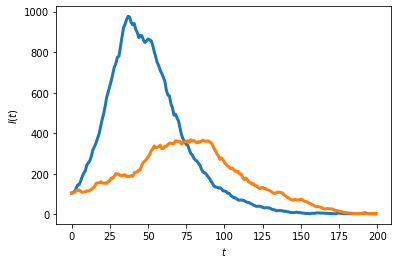

In [75]:
N=10000
eps=1e-2
alpha=-2.1 # decay much slower 
activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)

tmax=200
m=2
    
status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I
p=0.01 # initial seeds
lambd=0.8
mu=0.1

set_seeds(status,p)


it_t2=[]
memory={}
offset=1
beta=1
for t in range(tmax):
    G=activity_driven_net_memory(activity,offset,beta,memory,m)
    SIR_net(N,G,lambd,mu,status)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1.
        
    it_t2.append(inf)

plt.plot(it_t,lw=3)
plt.plot(it_t2,lw=3)
plt.xlabel('$t$')
plt.ylabel('$I(t)$')
plt.show()

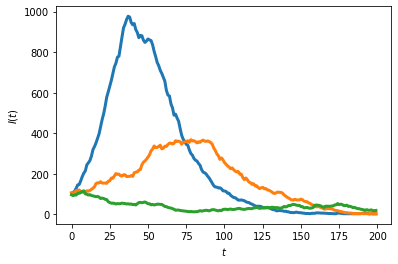

In [76]:
# the effect of beta?
N=10000
eps=1e-2
alpha=-2.1 # decay much slower 
activity={}
for i in range(N):
    activity[i]=power_law_dist(eps,alpha)

tmax=200
m=2
    
status=np.zeros(N,int) # status[i] = 0 for S; status[i] = 1 for I
p=0.01 # initial seeds
lambd=0.8
mu=0.1

set_seeds(status,p)


it_t3=[]
memory={}
offset=1
beta=2
for t in range(tmax):
    G=activity_driven_net_memory(activity,offset,beta,memory,m)
    SIR_net(N,G,lambd,mu,status)
    inf=0.
    for j in range(N):
        if status[j]==1:
            inf+=1.
        
    it_t3.append(inf)

plt.plot(it_t,lw=3)
plt.plot(it_t2,lw=3)
plt.plot(it_t3,lw=3)
plt.xlabel('$t$')
plt.ylabel('$I(t)$')
plt.show()

In [ ]:
# memory kills the spreading